In [57]:
from pyslise import Pyslise, PysliseHalf, PyslisePeriodic, SturmLiouville
import matplotlib.pyplot as plt
import numpy as np
from math import cos, pi, sin, sqrt, tan
plt.rcParams['figure.dpi'] = 100

a = 0
b = pi
q = lambda x: 2*cos(2 * x)

mathieu = Pyslise(q, a, b, tolerance=1e-10)
mathieu.eigenvaluesByIndex(0, 10, (0, 1))

[(0, -0.11024881699237495),
 (1, 3.917024773000778),
 (2, 9.047739259805182),
 (3, 16.03297008139124),
 (4, 25.02084082327983),
 (5, 36.01428991062799),
 (6, 49.01041824944128),
 (7, 64.00793718926892),
 (8, 81.00625032663902),
 (9, 100.00505067515601)]

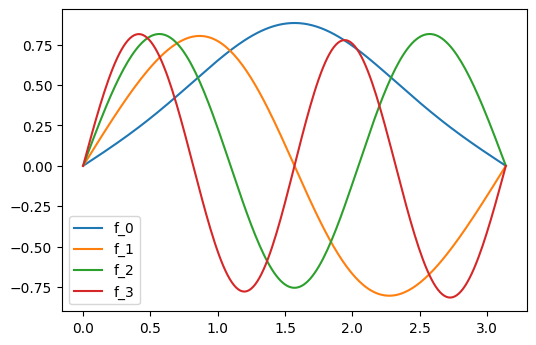

In [58]:
xs  = np.linspace(a, b, 200)

for i, E, f in mathieu.eigenpairsByIndex(0, 4, (0, 1)):
    ydy = f(xs)
    plt.plot(xs, ydy[0, :], label=f"f_{i}")
plt.legend()

In [59]:
a = pi/2
beta = 25

def q(x):
    return (beta * sin(2*x))**2 - 2 * beta*cos(2*x)

coffey_evans = PysliseHalf(q, pi/2, tolerance=1e-12)
coffey_evans.eigenvaluesByIndex(0, 10, (0, 1))

[(0, -3.723173188366647e-14),
 (1, 97.9345616863636),
 (2, 191.5876270396656),
 (3, 191.58763329139975),
 (4, 191.58763954313707),
 (5, 280.6142452706788),
 (6, 364.55142391717874),
 (7, 364.5556442011432),
 (8, 364.55986574706264),
 (9, 442.7565471968549)]

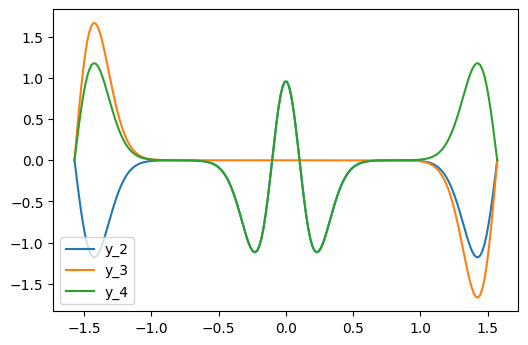

In [60]:
xs  = np.linspace(-a, a, 200)

for i, E, f in coffey_evans.eigenpairsByIndex(2, 5, (0, 1)):
    ydy = f(xs)
    y = ydy[0, :]
    plt.plot(xs, y, label=f"y_{i}")
plt.legend(loc="lower left")

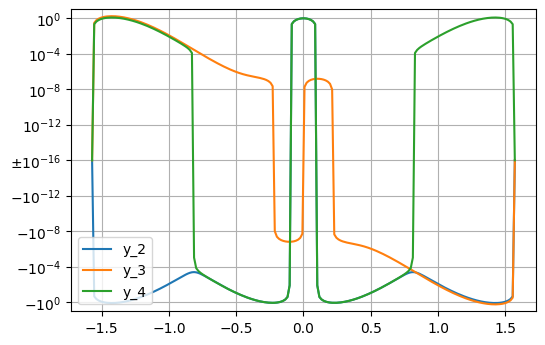

In [62]:
xs  = np.linspace(-a, a, 200)

for i, E, f in coffey_evans.eigenpairsByIndex(2, 5, (0, 1)):
    ydy = f(xs)
    y = ydy[0, :]
    plt.plot(xs, np.sign(y) * (np.log10(1e-16 + np.abs(y)) + 16), label=f"y_{i}")
yticks = range(-20, 20, 4)    
plt.yticks(yticks, labels=[f"${'±10' if y == 0 else np.sign(y)*10}^{{{np.abs(y)-16}}}$" for y in yticks])
plt.ylim(-17, 17)
plt.grid()
plt.legend(loc="lower left")

In [20]:
a = 0
b = pi
q = lambda x: 2*cos(2 * x)

mathieu_peri = PyslisePeriodic(q, a, b, tolerance=1e-10)
mathieu_peri.eigenvaluesByIndex(0, 10)

[(0, -0.4551386014522465, 1),
 (1, 3.9170247634857214, 1),
 (2, 4.3713009798891145, 1),
 (3, 16.032970102872774, 1),
 (4, 16.033832387159045, 1),
 (5, 36.01428986264241, 1),
 (6, 36.014290123286074, 1),
 (7, 64.00793734836229, 2),
 (9, 100.00505074496931, 2)]

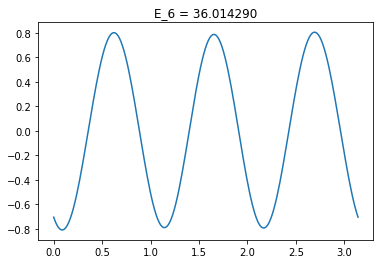

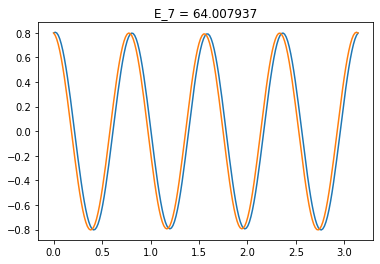

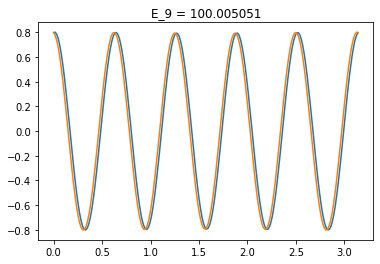

In [25]:
xs  = np.linspace(a, b, 200)

for i, E, fs in mathieu_peri.eigenpairsByIndex(6, 10):
    plt.title(f"E_{i} = {E:.6f}")
    for f in fs:
        ydy = f(xs)
        plt.plot(xs, ydy[0, :], label=f"f_{i}")
    plt.show()